
## Test 2
Let's let our imaginations run wild for a moment with this exercise.
You recently joined the Instagram Product team.
Your team is leading improvements to the Reels section.
But TikTok is succeeding and therefore stealing much of young people's attention. And less attention means fewer ads, and fewer ads mean less revenue. There's a lack of motivation on the team; perhaps it's too late.
It's urgent to regain leadership by putting Reels on par with TikTok. At the very least. There's even ambition to create an even better product.
As a Product Analyst, you've been assigned the mission of helping the team analyze Reels. The team has decided to launch "Prime Reels," a premium service for $9.99 per quarter. Users will no longer see ads on Reels and their videos will be shown to more users. Those without Prime membership will now see ads, and their videos will suffer a certain exposure penalty (number of views) compared to the current system. Five quarters later, we want to analyze the results.

In [6]:

import pandas as pd
import numpy as np

df = pd.read_csv("data_test2.csv", sep=";", thousands=".")
df.rename(columns={df.columns[0]: "Cohort"}, inplace=True)
df = df.replace({"N/A": np.nan})
for c in df.columns[1:]:
    df[c] = pd.to_numeric(df[c], errors="coerce")
df


,Cohort,Q1 '21,Q2 '21,Q3 '21,Q4 '21,Q1 '22
0,Q1 '21,5035.0,2497.0,1299.0,648.0,4
1,Q2 '21,NaN,4765.0,2294.0,1156.0,675
2,Q3 '21,NaN,NaN,5097.0,2638.0,1247
3,Q4 '21,NaN,NaN,NaN,5379.0,2897
4,Q1 '22,NaN,NaN,NaN,NaN,4825


In [7]:

df_analysis = df.set_index('Cohort')

print("User Numbers by Quarter and Cohort:")
print(df_analysis)

quarterly_totals = df_analysis.sum(axis=0, skipna=True)
print(f"\nTotal Active Users by Quarter:")
for quarter, total in quarterly_totals.items():
    print(f"  {quarter}: {total:,.0f} users")

User Numbers by Quarter and Cohort:
        Q1 '21  Q2 '21  Q3 '21  Q4 '21  Q1 '22
Cohort                                        
Q1 '21  5035.0  2497.0  1299.0   648.0       4
Q2 '21     NaN  4765.0  2294.0  1156.0     675
Q3 '21     NaN     NaN  5097.0  2638.0    1247
Q4 '21     NaN     NaN     NaN  5379.0    2897
Q1 '22     NaN     NaN     NaN     NaN    4825

Total Active Users by Quarter:
  Q1 '21: 5,035 users
  Q2 '21: 7,262 users
  Q3 '21: 8,690 users
  Q4 '21: 9,821 users
  Q1 '22: 9,648 users



## What “Tenure” Means (Cohort Analysis)
**Tenure** is the **relative age** of a cohort measured in equal periods (here, quarters) since signup.

- **Tenure 0**: the quarter the cohort joined (diagonal of the cohort matrix).  
- **Tenure 1**: one quarter after signup.  
- **Tenure 2**: two quarters after signup, and so on.

This aligns cohorts by **lifecycle stage** (Quarter 0, 1, 2, …) rather than by calendar labels (Q1 ’21, Q2 ’21…), so you always compare the same point in the lifecycle across cohorts.


##  How Read the Cohort Matrix
- **Rows** = cohorts (the quarter users signed up).  
- **Columns** = calendar quarters.  
- **Diagonal** = the **initial size** of each cohort (Tenure 0).  
- Cells to the **right** of the diagonal = users from that cohort active in later quarters (Tenure 1, 2, 3…).

> Example: For a cohort that started in Q1 ’21, the cells (Q1 ’21, Q1 ’21), (Q1 ’21, Q2 ’21), (Q1 ’21, Q3 ’21) correspond to Tenure 0, 1, 2 respectively.

## Retention by Cohort and Tenure

**Retention at tenure \(t\) for a given cohort:**
$$
\mathrm{Retention}_{\text{cohort},\,t}
=
\frac{\text{Active users of that cohort at tenure } t}
{\text{Initial cohort size (Tenure 0)}}
$$

**Average retention curve across cohorts (by tenure):**
$$
\overline{\mathrm{Retention}}(t)
=
\frac{1}{N_t}
\sum_{i \in \text{cohorts with data at } t}
\mathrm{Retention}_{i,\,t}
$$

Where \(N_t\) is the number of cohorts that have a valid observation at tenure \(t\).


## From Retention to LTV and Profitable CAC

- Price = **\$9.99 per quarter**.  
- Breakeven LTV assumes **~100% gross margin** (ignoring payment fees/opex).  
- Observation window = **5 quarters** (Tenure 0..4). If users stay longer, true LTV increases.

**Expected paying quarters (within observed window):**
$$
\mathbb{E}[\text{paying quarters}]
=
\sum_{t=0}^{T}
\overline{\mathrm{Retention}}(t)
$$

**Breakeven LTV:**
$$
\mathrm{LTV}_{\text{breakeven}}
=
(\$9.99)\times
\mathbb{E}[\text{paying quarters}]
$$

**CAC guidance:**
- **Max profitable CAC (breakeven)**:
$$
\mathrm{CAC}_{\max} \approx \mathrm{LTV}_{\text{breakeven}}
$$
- **Target CAC** (leave room for fees/opex/ad opportunity cost), e.g. **70% of LTV**:
$$
\mathrm{CAC}_{\text{target}} \approx 0.7 \times \mathrm{LTV}_{\text{breakeven}}
$$

> If you model payment fees, support cost/user, content costs, or the opportunity cost of removing ads for Prime users, subtract them from LTV before setting your CAC cap.


##  Simple Competitive Growth Analysis vs TikTok

**Quarter-over-quarter (QoQ) growth of total active users:**
1) Approximate total active users per quarter by summing each column of the cohort matrix:
   - Let \(U_q\) be total active users in quarter \(q\).
2) QoQ growth rate:
$$
\mathrm{Growth}_{q} \;(\%)
=
\left(
\frac{U_{q}-U_{q-1}}{U_{q-1}}
\right)\times 100
$$

**Pre–Post impact (Prime Reels effect):**
- Define **Pre-Prime** quarters (e.g., Q1 ’21–Q3 ’21) and **Post-Prime** quarters (e.g., Q4 ’21–Q1 ’22).  
- Compute average users in each period, \(\overline{U}_{\text{pre}}\) and \(\overline{U}_{\text{post}}\).

**Impact percentage:**
$$
\mathrm{Impact}\;(\%)
=
\left(
\frac{\overline{U}_{\text{post}} - \overline{U}_{\text{pre}}}
{\overline{U}_{\text{pre}}}
\right)\times 100
$$

**Interpretation:**
- Higher QoQ growth and a positive Pre–Post impact indicate stronger competitive momentum.  
- If growth slows or turns negative, investigate retention, acquisition, and product value drivers.


> As you extend the time window (more quarters) or refine margin assumptions, **recalculate LTV and CAC** accordingly.



## Build Retention by Tenure
- **Tenure 0** corresponds to the cohort's start quarter (diagonal in the cohort table).
- **Tenure 1, 2, …** are subsequent quarters for that same cohort.
- **Retention** at each tenure is computed as `active users at that tenure / initial cohort size`.


In [8]:

quarters = list(df.columns[1:])
cohorts = df["Cohort"].tolist()

values = df.set_index("Cohort")[quarters].to_numpy()

# Diagonal = initial size per cohort
initial_sizes = []
for i in range(len(cohorts)):
    if i < len(quarters):
        initial_sizes.append(values[i, i])
    else:
        initial_sizes.append(np.nan)
initial_sizes = np.array(initial_sizes, dtype=float)

max_tenure = len(quarters) - 1

retention_rows = []
for r, cohort in enumerate(cohorts):
    row = []
    n0 = initial_sizes[r]
    for t in range(0, max_tenure+1):
        c = r + t
        if np.isnan(n0) or c >= len(quarters):
            row.append(np.nan)
            continue
        val = values[r, c]
        row.append(np.nan if (pd.isna(val) or pd.isna(n0) or n0 == 0) else val / n0)
    retention_rows.append(row)

retention = pd.DataFrame(
    retention_rows,
    index=cohorts,
    columns=[f"Tenure {t}" for t in range(0, max_tenure+1)]
)
retention.round(4)


,Tenure 0,Tenure 1,Tenure 2,Tenure 3,Tenure 4
Q1 '21,1.0,0.4959,0.2580,0.1287,0.0008
Q2 '21,1.0,0.4814,0.2426,0.1417,NaN
Q3 '21,1.0,0.5176,0.2447,NaN,NaN
Q4 '21,1.0,0.5386,NaN,NaN,NaN
Q1 '22,1.0,NaN,NaN,NaN,NaN



## Average Retention Curve
We average retention **across cohorts** for each tenure to estimate a typical lifecycle. This gives us the share of the original cohort still active (and paying) in each subsequent quarter.


In [9]:

avg_retention = retention.mean(axis=0, skipna=True)
pd.DataFrame({
    "Tenure": retention.columns,
    "Avg Retention": avg_retention.values
}).round(4)


,Tenure,Avg Retention
0,Tenure 0,1.0000
1,Tenure 1,0.5084
2,Tenure 2,0.2484
3,Tenure 3,0.1352
4,Tenure 4,0.0008



## LTV and Profitable CAC
**Assumptions** :
- Revenue per active quarter: **$9.99** (Prime Reels price)
- Gross margin: **~100%** (ignoring fees and opex) to compute *breakeven* CAC
- Lifetime limited to the **observed 5 quarters**. If retention continues beyond, true LTV would be higher.

**Method**:  
Expected paying quarters = sum of average retention at each tenure.  
LTV (breakeven) = $9.99 × (expected paying quarters).

You should target CAC **below** LTV to maintain margins (e.g., 60–80% of LTV).


In [11]:

price_per_quarter = 9.99
expected_paying_quarters = float(np.nansum(avg_retention.values))
ltv_breakeven = price_per_quarter * expected_paying_quarters
recommended_cac = 0.7 * ltv_breakeven

summary = {
    "Expected Paying Quarters (within observed window)": round(expected_paying_quarters, 4),
    "LTV Breakeven ($)": round(ltv_breakeven, 2),
    "Recommended CAC Target (70% of LTV, $)": round(recommended_cac, 2)
}
summary


{'Expected Paying Quarters (within observed window)': 1.8928,
 'LTV Breakeven ($)': 18.91,
 'Recommended CAC Target (70% of LTV, $)': 13.24}


## Visualization
Average retention curve by tenure.


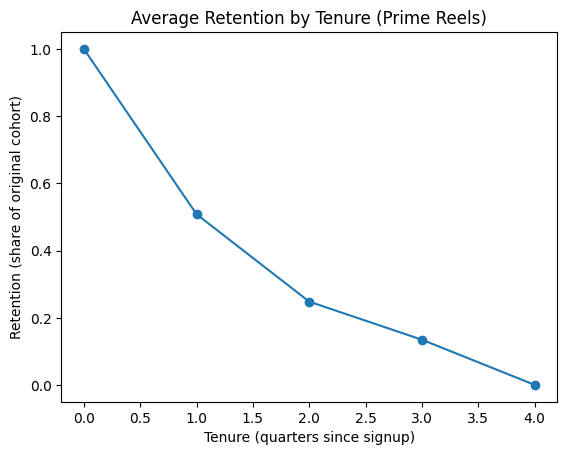

In [12]:

import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(len(avg_retention)), avg_retention.values, marker="o")
plt.title("Average Retention by Tenure (Prime Reels)")
plt.xlabel("Tenure (quarters since signup)")
plt.ylabel("Retention (share of original cohort)")
plt.show()


In a nutshell, the chart tells you this:

A very sharp drop after the 1st quarter: from 100% (Tenure 0) to ~51% in Tenure 1.

Sustained churn afterward: ~25% in Tenure 2 and ~13.5% in Tenure 3.

Almost no one follows through to the 5th quarter: ~0.08% in Tenure 4.


## Answers

**(a) Retention by cycle/quarter**  
Use the *Retention by Cohort & Tenure* table for cohort-level percentages. The *Average Retention Curve* summarizes a typical share of users active each quarter. These are computed directly from your cohort counts by dividing each cell by the cohort's initial size (diagonal).

a) What percentage of user retention do we have each cycle/quarter?

Using the cohort matrix normalized by each cohort’s initial size (diagonal), the average retention by tenure is:

Tenure 0: 100.00%

Tenure 1: 50.84%

Tenure 2: 24.84%

Tenure 3: 13.52%

Tenure 4: 0.08%

(“Tenure t” = t quarters after signup.)

### b) Profitable CAC (using the retention chart)

From the chart, the average retention by tenure is approximately:
- Tenure 0: **1.00**
- Tenure 1: **0.51**
- Tenure 2: **0.25**
- Tenure 3: **0.14**
- Tenure 4: **0.00**

**Expected paying quarters (area under the curve):**

$$
\mathbb{E}[\text{quarters}] \;=\; \sum_{t=0}^{4} \bar{r}_t \;=\; 1.00 + 0.51 + 0.25 + 0.14 + 0.00 \;\approx\; 1.89
$$

**Price:** \$9.99 per quarter

**Breakeven LTV:**

$$
\text{LTV}_{\text{breakeven}} \;=\; 9.99 \times 1.89 \;\approx\; \$18.91
$$

**Profitable CAC (max to break even):** **\$18.91**

**Recommended CAC target (~70% of LTV, to allow fees/opex):**

$$
\text{CAC}_{\text{target}} \;\approx\; 0.7 \times 18.91 \;\approx\; \$13.24
$$



> Notes: If Prime users remain subscribed beyond five quarters, true LTV would increase, allowing a higher CAC. Conversely, if you include payment fees, support costs, or ad-opportunity cost (Prime users remove ads), you should subtract those from LTV to get a stricter CAC cap.
